# Submission statistics and merge notebook

In [1]:
import pandas as pd
import numpy as np
import sys
import os

from src import data_prepare

label_map=data_prepare.load_label_map()
post,thread=data_prepare.load_test_data()

In [2]:
module_path = os.path.abspath(os.path.join('..'))
subm_path = os.path.join(module_path,'submissions')

### For the sake of diversity I chose best submissions with absolutely different models

In [3]:
best = pd.read_csv(os.path.join(subm_path,'sol21.csv'))
best = pd.Series(best["thread_label_id"])

In [4]:
cnn=pd.read_csv(os.path.join(subm_path,'sol28.csv'))
cnn=pd.Series(cnn["thread_label_id"])

In [5]:
rforest=pd.read_csv(os.path.join(subm_path,'sol32.csv'))
rforest=pd.Series(rforest["thread_label_id"])

In [6]:
svc=pd.read_csv(os.path.join(subm_path,'sol25.csv'))
svc=pd.Series(svc["thread_label_id"])

In [7]:
df=pd.DataFrame({'best':best ,'cnn': cnn,'rforest':rforest,'svc': svc})
df

,best,cnn,rforest,svc
0,8,8,8,8
1,8,8,8,8
2,8,0,8,8
3,1,1,1,1
4,8,8,8,8
5,1,0,9,4
6,4,0,4,4
7,8,8,8,8
8,9,9,9,9
9,2,2,2,2


In [8]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

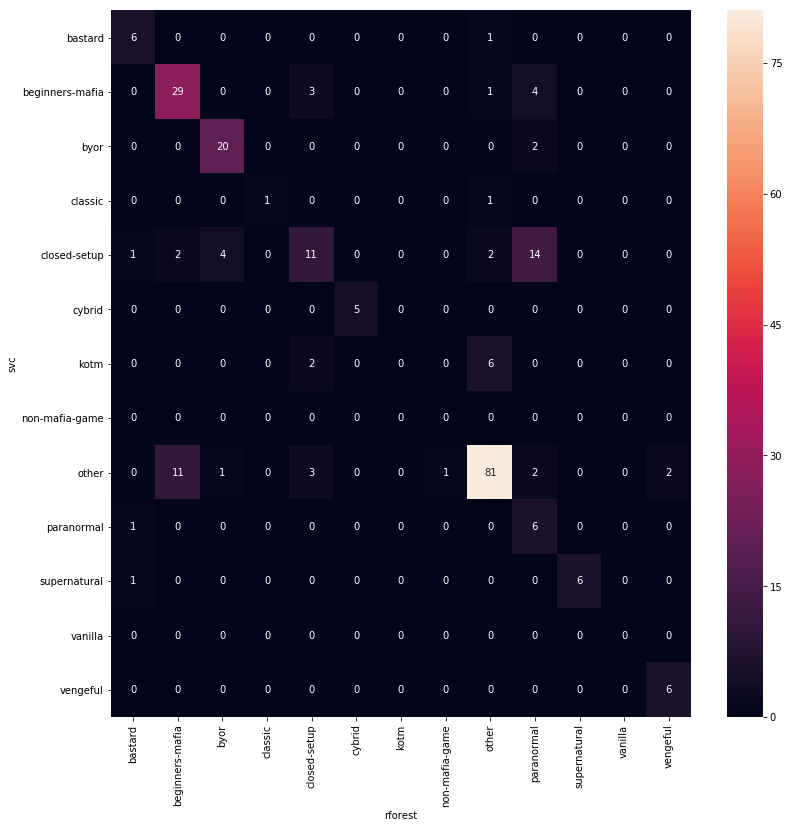

In [9]:
conf_mat = confusion_matrix(svc, rforest,labels=label_map["type_id"].values)
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=label_map.index, yticklabels=label_map.index)
plt.ylabel('svc')
plt.xlabel('rforest')
plt.show()

### I am going to just get modes of all rows and use them as a prediction, simply picking the most frequent value

In [10]:
total=df.mode(axis=1)

In [11]:
total.rename(columns={0:'subm'},inplace=True)

In [12]:
sub=total['subm']

In [13]:
ans = pd.concat([thread["thread_num"],sub], axis=1, keys=['thread_num', 'thread_label_id'])
ans=ans.set_index("thread_num")
ans=ans.astype(int)
ans.head()

,thread_label_id
thread_num,
126856,8
132415,8
134482,8
133728,1
134270,8


In [14]:
path=os.path.join(module_path,"submissions")
ans.to_csv(os.path.join(path,"submissions_merge.csv"))

**By the way, this type of 'technique' gave me my second best submission**